In [11]:
import pandas as pd

def get_stock_df(code: str) -> pd.DataFrame:
    df = pd.read_csv(f'../data/{code}.XSHE_2023-03-28_2024-04-03.csv')
    return df

In [2]:
df = get_stock_df("000001")

In [3]:
df[:2]

,date,open,close,high,low,volume,money,factor
0,2023-03-28,11.53,11.52,11.60,11.43,73959636.0,851797869.0,0.91113
1,2023-03-29,11.60,11.42,11.61,11.39,65420339.0,750687551.0,0.91113


In [4]:
df.iloc[1, 0]

'2023-03-29'

In [6]:
df.loc[1, "close"]

11.42

In [7]:
df.shape

(248, 8)

In [8]:
df.columns

Index(['date', 'open', 'close', 'high', 'low', 'volume', 'money', 'factor'], dtype='object')

In [9]:
close_price = {}

close_price["000001"] = df['close']

close_price

{'000001': 0      11.52
 1      11.42
 2      11.55
 3      11.42
 4      11.54
        ...  
 243     9.79
 244     9.82
 245     9.93
 246     9.85
 247     9.76
 Name: close, Length: 248, dtype: float64}

In [12]:
df34 = get_stock_df("000034")
df35 = get_stock_df("000035")

close_price["000034"] = df34["close"]
close_price["000035"] = df35["close"]

close_df = pd.DataFrame(close_price)

close_df

,000001,000034,000035
0,11.52,30.49,5.23
1,11.42,30.16,5.13
2,11.55,29.30,5.13
3,11.42,30.53,5.15
4,11.54,31.69,5.10
...,...,...,...
243,9.79,30.65,4.26
244,9.82,29.10,4.39
245,9.93,29.57,4.40
246,9.85,28.64,4.47


In [13]:
close_df.corr()

,000001,000034,000035
000001,1.000000,-0.218875,0.187163
000034,-0.218875,1.000000,0.320088
000035,0.187163,0.320088,1.000000


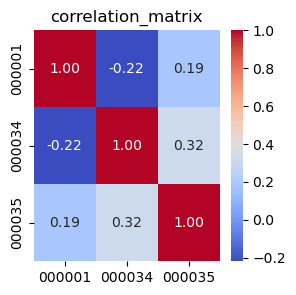

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# 计算DataFrame中所有列之间的相关性
correlation_matrix = close_df.corr()

plt.figure(figsize=correlation_matrix.shape)

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

plt.title("correlation_matrix")

plt.show()